####Copyright 2020 Google LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Introduction to Pandas

[Pandas](https://pandas.pydata.org/) is an open-source library for data analysis and manipulation. It is a go-to toolkit for data scientists and is used extensively in this course.

Pandas integrates seamlessly with other Python libraries such as [NumPy](http://www.numpy.org) and [Matplotlib](http://www.matplotlib.org) for numeric processing and visualizations.

When using Pandas, we will primarily interact with [DataFrames](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) and [Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html), which we will introduce in this lab.

## Importing Pandas

In order to use Pandas, you must import it. This is as simple as:

```python
import pandas
```

However, you'll rarely see Pandas imported this way. By convention programmers rename Pandas to `pd`. This isn't a requirement, but it is a pattern that you'll see repeated often.

To import Pandas in the conventional manner run the code block below.

In [3]:
import pandas as pd

pd.__version__

'1.1.5'

After importing Pandas as `pd` we can use pandas by calling methods provided by `pd`. In the code block above we printed the Pandas version.

Pandas went 1.0.0 on January 29, 2020. The interface should stay relatively stable until a 2.0.0 release is declared sometime in the future. If you ever have a problem where a Pandas function isn't acting the way you think it should, be sure to check out which version you are using and find the documentation for that specific version.

## Pandas Series

A [Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html) represents a sequential list of data. It is a foundational building block of the powerful [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) that we'll cover later in this lab.

### Creating a Series

We create a new `Series` object as we would any Python object:

```python
s = pd.Series()
```

This creates a new, empty `Series` object, which isn't very interesting. You can create a series object with data by passing it a list or tuple:

In [4]:
temperatures = [55, 63, 72, 65, 63, 75, 67, 59, 82, 54]

series = pd.Series(temperatures)

print(type(series))
print(series)

<class 'pandas.core.series.Series'>
0    55
1    63
2    72
3    65
4    63
5    75
6    67
7    59
8    82
9    54
dtype: int64


Here we created a new `pandas.core.series.Series` object with ten values presumably representing some temperature measurement.

### Analyzing a Series

You can ask the series to compute information about itself. The `describe()` method provides statistics about the series.

In [5]:
series.describe()

count    10.000000
mean     65.500000
std       8.847473
min      54.000000
25%      60.000000
50%      64.000000
75%      70.750000
max      82.000000
dtype: float64

You can also find other information about a `Series` such as if its values are all unique:

In [6]:
series.is_unique

False

Or if it is monotonically increasing or decreasing:

In [7]:
print(series.is_monotonic)

False


#### Exercise 1: Standard Deviation

Create a series using the list of values provided below. Then, using a function in the [Series](https://pandas.pydata.org/pandas-docs/stable/reference/series.html) class, find the standard deviation of the values in that series and store it in the variable `std_dev`.

**Student Solution**

In [8]:
import pandas as pd

weights = (120, 143, 98, 280, 175, 205, 210, 115, 122, 175, 201)

series = pd.Series(weights)
std_dev = series.std()
print(std_dev)


54.421085485816484


---

### Accessing Values

Let's take another look at the first series that we created in this lab:

In [9]:
temperatures = [55, 63, 72, 65, 63, 75, 67, 59, 82, 54]

series = pd.Series(temperatures)

print(type(series))
print(series)

<class 'pandas.core.series.Series'>
0    55
1    63
2    72
3    65
4    63
5    75
6    67
7    59
8    82
9    54
dtype: int64


We can see the values printed down the right-side column. But what are those numbers along the left?

They are **indices**.

You are probably thinking that `Series` objects feel a whole lot like lists, tuples, and `NumPy` arrays. If so, you are correct.

They are very similar to these other sequential data structures, and individual items in a series can be accessed by index as expected.

In [10]:
series[4]

63

You can also loop over the values in a `Series`.

In [11]:
for temp in series:
  print(temp)

55
63
72
65
63
75
67
59
82
54


### Modifying Values

Series are mutable, so you can modify individual values.

In [12]:
temperatures = [55, 63, 72, 65, 63, 75, 67, 59, 82, 54]
series = pd.Series(temperatures)

print(series[1])

series[1] = 65

print(series[1])

63
65


You can also modify all of the elements in a series using standard Python expressions. For instance, if we wanted to add `1` to every item in a series, we can just do:

In [ ]:
series + 1

0    56
1    66
2    73
3    66
4    64
5    76
6    68
7    60
8    83
9    55
dtype: int64

Note that this doesn't actually change the `Series` though. To do that we need to assign the computation back to our original series.

More operations than addition can be applied. You can add, subtract, multiple, divide, and more with a simple Python expression.

In [13]:
series = series + 1
series

0    56
1    66
2    73
3    66
4    64
5    76
6    68
7    60
8    83
9    55
dtype: int64

You can remove values from the series by index using `pop`:


In [14]:
temperatures = [55, 63, 72, 65, 63, 75, 67, 59, 82, 54]
series = pd.Series(temperatures)

print(series)

series.pop(4)

print(series)

0    55
1    63
2    72
3    65
4    63
5    75
6    67
7    59
8    82
9    54
dtype: int64
0    55
1    63
2    72
3    65
5    75
6    67
7    59
8    82
9    54
dtype: int64


Notice that when we print the series out a second time, the index with value `4` is missing. After we pop the value out, the index is no longer valid to access!

In [15]:
try:
  print(series[4])
except:
  print('Unable to print the value at index 4')

Unable to print the value at index 4


In order to get the indices back into a smooth sequential order, we can call the `reset_index` function. We pass the argument `drop=True` to tell Pandas *not* to save the old index as a new column. We pass the argument `inplace=True` to tell Pandas to modify the series directly instead of making a copy. 

In [16]:
series.reset_index(drop=True, inplace=True)
series

0    55
1    63
2    72
3    65
4    75
5    67
6    59
7    82
8    54
dtype: int64

This is very different from what we would expect from a normal Python list! While it is possible to use `pop` on a list, the indices will automatically reset.

In [17]:
temperatures = [55, 63, 72, 65, 63, 75, 67, 59, 82, 54]

print(temperatures)

temperatures.pop(4)

print(temperatures[4])

[55, 63, 72, 65, 63, 75, 67, 59, 82, 54]
75


You can also add values to a `Series` by appending another `Series` to it. We pass the argument `ignore_index=True` to tell Pandas to append the values with new indices, rather than copying over the old indices of the appended values. In this case, that means the new values (`66` and `74`) get the indices `10` and `11`, rather than `0` and `1`:

In [18]:
temperatures = [55, 63, 72, 65, 63, 75, 67, 59, 82, 54]
series = pd.Series(temperatures)

print(series)

new_series = pd.Series([66, 74])
series = series.append(new_series, ignore_index=True)

print(series)

0    55
1    63
2    72
3    65
4    63
5    75
6    67
7    59
8    82
9    54
dtype: int64
0     55
1     63
2     72
3     65
4     63
5     75
6     67
7     59
8     82
9     54
10    66
11    74
dtype: int64


#### Exercise 2: Sorting a Series

Find the correct method in the [Series documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) to sort the values in `series` in ascending order. Be sure the indices are also sorted and that the new sorted series is stored in the `series` variable.

**Student Solution**

In [19]:
temperatures = [55, 63, 72, 65, 63, 75, 67, 59, 82, 54]
series = pd.Series(temperatures)
seri = series.sort_values()
seri.reset_index(drop=True, inplace=True)
print(seri)



0    54
1    55
2    59
3    63
4    63
5    65
6    67
7    72
8    75
9    82
dtype: int64


---

## Pandas DataFrame

Now that we have a basic understanding of `Series`, let's dive into the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). If you picture `Series` as a *list* of data, you can think of `DataFrame` as a *table* of data.

A `DataFrame` consists of one or more `Series` presented in a tabular format. Each `Series` in the `DataFrame` is a column.

### Creating a DataFrame

We can create an empty `DataFrame` using the `DataFrame` class in Pandas:

```python
df = pd.DataFrame()
```

But an empty `DataFrame` isn't particularly exciting. Instead, let's create a `DataFrame` using a few series.

In the code block below you'll see that we have three series:

1. Cities
1. Populations of those cities
1. Number of airports in those cities


In [20]:
city_names = pd.Series([
  'Atlanta', 
  'Austin', 
  'Kansas City',
  'New York City', 
  'Portland', 
  'San Francisco', 
  'Seattle',
])

population = pd.Series([
  498044,
  964254,
  491918,
  8398748,
  653115,
  883305, 
  744955,
])

num_airports = pd.Series([
  2,
  2,
  8,
  3,
  1,
  3,
  2,
])

print(city_names, population, num_airports)

0          Atlanta
1           Austin
2      Kansas City
3    New York City
4         Portland
5    San Francisco
6          Seattle
dtype: object 0     498044
1     964254
2     491918
3    8398748
4     653115
5     883305
6     744955
dtype: int64 0    2
1    2
2    8
3    3
4    1
5    3
6    2
dtype: int64


We can now combine these series into a `DataFrame`, using a dictionary with keys as the column names and values as the series:

In [21]:
df = pd.DataFrame({
  'City Name': city_names,
  'Population': population, 
  'Airports': num_airports,
})

print(df)

       City Name  Population  Airports
0        Atlanta      498044         2
1         Austin      964254         2
2    Kansas City      491918         8
3  New York City     8398748         3
4       Portland      653115         1
5  San Francisco      883305         3
6        Seattle      744955         2


The data is now displayed in a tabular format. We can see that there are three columns: `City Name`, `Population`, and `Airports`. There are six rows, each row representing the data for a single city.

In the block above we used the `print` function to display the `DataFrame`, which printed out the data in a plain text form. Colab and other notebook environments can "pretty print" DataFrames if you make it the last part of a code block and don't wrap the variable in a `print` statement. Run the code block below to see this in action.

In [22]:
df = pd.DataFrame({
  'City Name': city_names,
  'Population': population, 
  'Airports': num_airports,
})

df

,City Name,Population,Airports
0,Atlanta,498044,2
1,Austin,964254,2
2,Kansas City,491918,8
3,New York City,8398748,3
4,Portland,653115,1
5,San Francisco,883305,3
6,Seattle,744955,2


That's much easier on the eyes! The rows are colored in an alternating background color scheme, which makes long rows of data easier to view.

### Analyzing a DataFrame

Similar to a `Series`, you can ask the `DataFrame` to compute information about itself. The `describe()` method provides statistics about the `DataFrame`.

In [23]:
df.describe()

,Population,Airports
count,7.000000e+00,7.000000
mean,1.804906e+06,3.000000
std,2.913095e+06,2.309401
min,4.919180e+05,1.000000
25%,5.755795e+05,2.000000
50%,7.449550e+05,2.000000
75%,9.237795e+05,3.000000
max,8.398748e+06,8.000000


These are the same statistics that we got when we called `describe` on a `Series` above. As you work with Pandas, you'll find that many of the methods that operate on `Series` also work with `DataFrame` objects.

*Did you notice something missing in the output from `describe` though?*

We have three columns in our `DataFrame`, but only two columns have statistics printed for them. This is because `describe` only works with numeric `Series` by default, and the 'City Name' column is a string.

To show all columns add an `include='all'` argument to describe:

In [24]:
df.describe(include='all')

,City Name,Population,Airports
count,7,7.000000e+00,7.000000
unique,7,NaN,NaN
top,New York City,NaN,NaN
freq,1,NaN,NaN
mean,NaN,1.804906e+06,3.000000
std,NaN,2.913095e+06,2.309401
min,NaN,4.919180e+05,1.000000
25%,NaN,5.755795e+05,2.000000
50%,NaN,7.449550e+05,2.000000
75%,NaN,9.237795e+05,3.000000


We now get a few more metrics specific to string columns: `unique`, `top`, and `freq`. We also now can see the 'City Name' column.

If we want to look at the data we could print the entire `DataFrame`, but that doesn't scale well for really large `DataFrames`. The `head` method is a way to just look at the first few rows of a `DataFrame`.

In [25]:
df.head()

,City Name,Population,Airports
0,Atlanta,498044,2
1,Austin,964254,2
2,Kansas City,491918,8
3,New York City,8398748,3
4,Portland,653115,1


Conversely, the `tail` method returns the last few rows of a data frame.

In [26]:
df.tail()

,City Name,Population,Airports
2,Kansas City,491918,8
3,New York City,8398748,3
4,Portland,653115,1
5,San Francisco,883305,3
6,Seattle,744955,2


You can also choose the number of rows you want to print as part of `head` and `tail`.

In [27]:
df.head(2)

,City Name,Population,Airports
0,Atlanta,498044,2
1,Austin,964254,2


These are useful ways at taking a look at actual data, but they can have some inherent bias in them. If the data is sorted by any column values, `head` or `tail` might show a skewed view of the data.

One way to combat this is to always look at both the head and tail of your data. Another way is to randomly sample your data and look at the sample. This will reduce the chance that you are seeing a lopsided view of your data.

We can also visualize the data in a `DataFrame`. The `hist` command will make a histogram of each of the numerical columns. As you will see, some of these histograms are more informative than others.

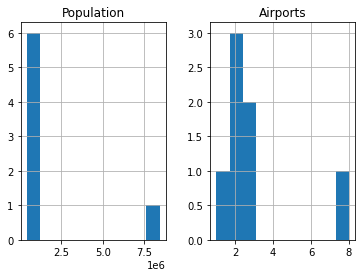

In [28]:
data = df.hist()

**What Information Might We Gain From These Histograms?**

In the airports histogram, we can see that there is one outlier (Kansas City), and all other cities have roughly two airports.

In the population histogram, we can see that there is also one outlier (New York City), which has an order of magnitude more population, such that all other populations are very close to zero in comparison. We also see here how the axis can get very messy.

#### Exercise 3: Sampling Data

Find a method in the [DataFrame documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) that returns a random sample of your `DataFrame`. Call that method and make it return five rows of data.

**Student Solution**

In [29]:
city_names = pd.Series(['Atlanta', 'Austin', 'Kansas City', 'New York City', 
                        'Portland', 'San Francisco', 'Seattle'])
population = pd.Series([498044, 964254, 491918, 8398748, 653115, 883305, 744955])
num_airports = pd.Series([2, 2, 8, 3, 1, 3, 2])

df = pd.DataFrame({
  'City Name': city_names,
  'Population': population, 
  'Airports': num_airports,
})

df
df.head(5)

,City Name,Population,Airports
0,Atlanta,498044,2
1,Austin,964254,2
2,Kansas City,491918,8
3,New York City,8398748,3
4,Portland,653115,1


---

### Accessing Values

We saw that individual values in a  `Series` can be accessed using indexing similar to that seen in standard Python lists and tuples. Accessing values in `DataFrame` objects is a little more involved.

#### Accessing Columns

To access an entire column of data you can index the `DataFrame` by column name. For instance, to return the entire `City Name` column as a `Series` you can run the code below:

In [30]:
df['City Name']

0          Atlanta
1           Austin
2      Kansas City
3    New York City
4         Portland
5    San Francisco
6          Seattle
Name: City Name, dtype: object

But what if you want a `DataFrame` instead of a `Series`?

In this case, you index the `DataFrame` using a list, where the list contains the name of the column that you want returned as a `DataFrame`:

In [31]:
df[['City Name']]

,City Name
0,Atlanta
1,Austin
2,Kansas City
3,New York City
4,Portland
5,San Francisco
6,Seattle


Similarly, you can return more than one column in the resultant `DataFrame`:

In [32]:
df[['City Name']]

,City Name
0,Atlanta
1,Austin
2,Kansas City
3,New York City
4,Portland
5,San Francisco
6,Seattle


Sometimes you might also see columns of data referenced using the dot notation:

In [33]:
df.Population

0     498044
1     964254
2     491918
3    8398748
4     653115
5     883305
6     744955
Name: Population, dtype: int64

This is a neat trick, but it is problematic for a couple of reasons:

1. You can only get a `Series` back.
1. It is impossible to reference columns with spaces in the names with this notation (ex. 'City Name').
1. It is confusing if a column has the same name as an inbuilt method of a `DataFrame`, such as `size`.

We mention this notation because you'll likely see it. However, we don't advise using it.

#### Accessing Rows

In order to access rows of data, you can't use standard indexing. It would seem natural to index using a numeric row value, but as you can see in the example below, this yields a `KeyError`.

In [34]:
try:
  df[1]
except KeyError:
  print('Got KeyError')

Got KeyError


This is because the default indexing is to look for column names, and numbers are valid column names. If you had a column named `1` in a `DataFrame` with at least two rows, Pandas wouldn't know if you wanted row `1` or column `1`.

In order to index by row, you must use the `iloc` feature of the `DataFrame` object.

In [35]:
df.iloc[1]

City Name     Austin
Population    964254
Airports           2
Name: 1, dtype: object

The code above returns the second row of data in the `DataFrame` as a `Series`.

You can also return multiple rows using slices:

In [36]:
df.iloc[1:3]

,City Name,Population,Airports
1,Austin,964254,2
2,Kansas City,491918,8


As an aside, if you do use a range, then `iloc` is optional since columns can't be referenced in a range, and the default selector can disambiguate what you are doing. This can be a little confusing, though, so try to avoid it.

In [37]:
df[1:3]

,City Name,Population,Airports
1,Austin,964254,2
2,Kansas City,491918,8


If you want sparse rows that don't fall into an easily defined range, you can pass `iloc` a list of rows that you would like returned:

In [38]:
df.iloc[[1, 3]]

,City Name,Population,Airports
1,Austin,964254,2
3,New York City,8398748,3


##### Exercise 4: Single Row as a `DataFrame`

Given the methods of accessing rows in a `DataFrame` that we have learned so far, how would you access the third row in the `df` `DataFrame` defined below as a `DataFrame` itself (as opposed to as a `Series`)?

**Student Solution**

In [39]:
city_names = pd.Series(['Atlanta', 'Austin', 'Kansas City', 'New York City', 
                        'Portland', 'San Francisco', 'Seattle'])
population = pd.Series([498044, 964254, 491918, 8398748, 653115, 883305, 744955])
num_airports = pd.Series([2, 2, 8, 3, 1, 3, 2])

df = pd.DataFrame({
    
  'City Name': city_names,
  'Population': population, 
  'Airports': num_airports,
})
df.iloc[[2]]


,City Name,Population,Airports
2,Kansas City,491918,8


---

##### Accessing Row/Column Intersections

We've learned how to access columns by direct indexing on the `DataFrame`. We've learned how to access rows by using `iloc`. You can combine these two access methods using the `loc` functionality of the `DataFrame` object.

Simply call `loc` and pass it two arguments:

1. The row(s) you want to access
1. The column(s) you want to access

In the example below we access the 'City Name' in the third row of the `DataFrame`:

In [40]:
city_names = pd.Series(['Atlanta', 'Austin', 'Kansas City', 'New York City', 
                        'Portland', 'San Francisco', 'Seattle'])
population = pd.Series([498044, 964254, 491918, 8398748, 653115, 883305, 744955])
num_airports = pd.Series([2, 2, 8, 3, 1, 3, 2])

df = pd.DataFrame({
  'City Name': city_names,
  'Population': population, 
  'Airports': num_airports,
})

df.loc[2, 'City Name']

'Kansas City'

In the example below we access the 'City Name' and 'Airports' columns in the third and fourth rows of the `DataFrame`:

In [41]:
city_names = pd.Series(['Atlanta', 'Austin', 'Kansas City', 'New York City', 
                        'Portland', 'San Francisco', 'Seattle'])
population = pd.Series([498044, 964254, 491918, 8398748, 653115, 883305, 744955])
num_airports = pd.Series([2, 2, 8, 3, 1, 3, 2])

df = pd.DataFrame({
  'City Name': city_names,
  'Population': population, 
  'Airports': num_airports,
})

df.loc[[2,3], ['City Name', 'Airports']]

,City Name,Airports
2,Kansas City,8
3,New York City,3


We will learn more about `loc` in the next section. Specifically, we will come to understand how using `loc` enables us to access a `DataFrame` directly in order to modify it.

#### Modifying Values

There are many ways to modify values in a `DataFrame`. We'll look at a few of the more straightforward ways in this section.

##### Modifying Individual Values

The easiest way to modify a single value in a `DataFrame` is to directly index it on the left-hand sign of an expression.

Let's say the Seattle area got a new commercial airport called Paine Field. If we want to increment the number of airports for Seattle, we could access the Seattle airport count directly and modify it:

In [42]:
city_names = pd.Series(['Atlanta', 'Austin', 'Kansas City', 'New York City', 
                        'Portland', 'San Francisco', 'Seattle'])
population = pd.Series([498044, 964254, 491918, 8398748, 653115, 883305, 744955])
num_airports = pd.Series([2, 2, 8, 3, 1, 3, 2])

df = pd.DataFrame({
  'City Name': city_names,
  'Population': population, 
  'Airports': num_airports,
})

df.loc[6, 'Airports'] = 3
df

,City Name,Population,Airports
0,Atlanta,498044,2
1,Austin,964254,2
2,Kansas City,491918,8
3,New York City,8398748,3
4,Portland,653115,1
5,San Francisco,883305,3
6,Seattle,744955,3


##### Modifying an Entire Column

Modifying a single value is a great skill to have, especially when working with small numbers of  **outliers**. However, you'll often want to work with larger swaths of data.

When would you want to do this?

Consider the 'Population' column that we have been working with in this lab. It is integer-valued, however in some cases it might be better to work with the "thousands" value. For this we can do column-level modifications.

In the example below we simply divide the population by 1,000.

In [43]:
city_names = pd.Series(['Atlanta', 'Austin', 'Kansas City', 'New York City', 
                        'Portland', 'San Francisco', 'Seattle'])
population = pd.Series([498044, 964254, 491918, 8398748, 653115, 883305, 744955])
num_airports = pd.Series([2, 2, 8, 3, 1, 3, 2])

df = pd.DataFrame({
  'City Name': city_names,
  'Population': population, 
  'Airports': num_airports,
})

df['Population'] /= 1000
df

,City Name,Population,Airports
0,Atlanta,498.044,2
1,Austin,964.254,2
2,Kansas City,491.918,8
3,New York City,8398.748,3
4,Portland,653.115,1
5,San Francisco,883.305,3
6,Seattle,744.955,2


Instead of overwriting the existing column, you may instead want to create a new column. This can be done by assigning to a new column name:

In [44]:
city_names = pd.Series(['Atlanta', 'Austin', 'Kansas City', 'New York City', 
                        'Portland', 'San Francisco', 'Seattle'])
population = pd.Series([498044, 964254, 491918, 8398748, 653115, 883305, 744955])
num_airports = pd.Series([2, 2, 8, 3, 1, 3, 2])

df = pd.DataFrame({
  'City Name': city_names,
  'Population': population, 
  'Airports': num_airports,
})

df['Population_M'] = df['Population'] / 1000
df

,City Name,Population,Airports,Population_M
0,Atlanta,498044,2,498.044
1,Austin,964254,2,964.254
2,Kansas City,491918,8,491.918
3,New York City,8398748,3,8398.748
4,Portland,653115,1,653.115
5,San Francisco,883305,3,883.305
6,Seattle,744955,2,744.955


### Fetching Data


So far we have created the data that we have worked with from scratch. In reality, we'll load our data from a file system, the internet, a database, or one of many other sources.

Throughout this course, we'll load data in many ways. Let's start by loading the data from the internet directly.

For this, we'll use the Pandas method `read_csv`. This method can read comma-separated data from a URL. See an example below:

In [45]:
url = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"
california_housing_dataframe = pd.read_csv(url)
california_housing_dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


We now have a `DataFrame` full of data about housing prices in California. This is a classic dataset that we'll look at more closely in future labs. For now, we'll load it in and try to get an understanding of the data.

## Exercise 5: Exploring Data

In this exercise we will write code to explore the California housing dataset mentioned earlier in this lab. As seen previously, we can load the data using the following code:

In [46]:
url = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"
california_housing_df = pd.read_csv(url)
california_housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


### Question 1: Histograms

This question will have two parts: one coding and one data analysis.

#### Question 1.1: Display Histograms

Write the code to display histograms for all numeric columns in the `california_housing_df` object.

**Student Solution**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9f3a94490>,
      dtype=object)

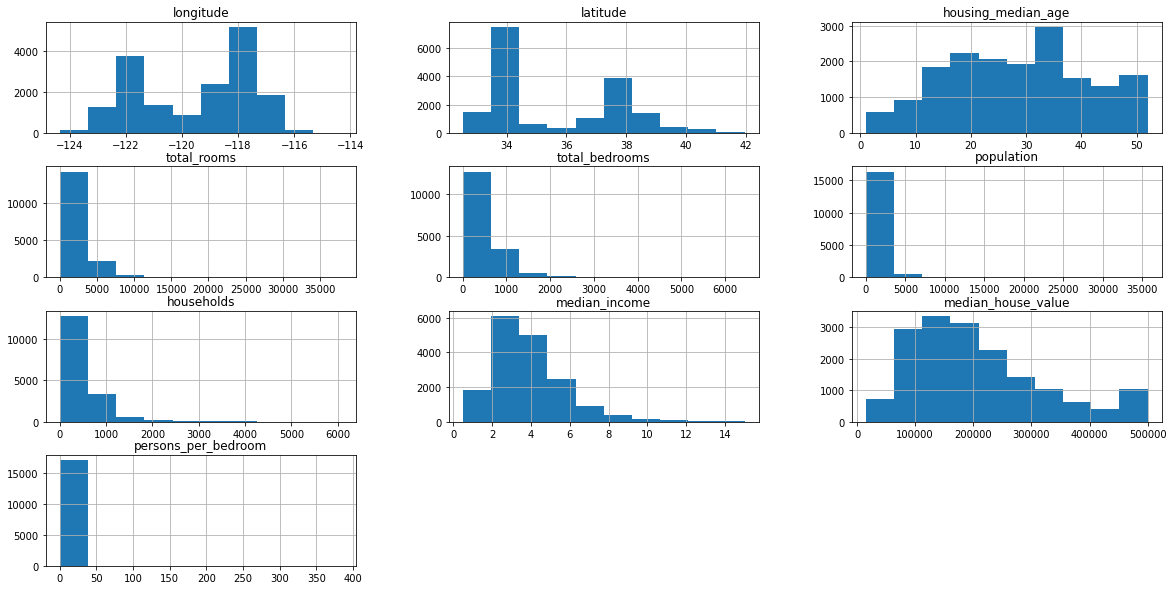

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 10))
axs = fig.add_subplot()
california_housing_df.hist(ax=axs)

---

#### Question 1.2: Histogram Analysis

Two of the histograms have two strong peaks rather than one. Which columns are these? What do you think this tells us about the data?

**Student Solution**

What are the names of the two columns with two strong peaks each?
1. *Longitude*
1. *Latitude*

What insights do you gather from the columns with dual peaks?:
* *In longitude, the two highest peaks are at -112 and -118
on latitude, the two highest peaks are at 34 and 38
The highest housing median age value is 35
the highest median house is between 100000-150000*

---

### Question 2: Ordering

Does there seem to be any obvious ordering to the data? If so, what is the ordering? Show the code that you used to determine your answer.


**Student Solution**

Is there any ordering?
* *Yes*

If there was ordering, what columns were sorted and in what order (ascending/descending)?:
* *At a minimum, longitude is in descending order. latitude also seems to be in descending order relative to longitude, but that is more difficult to determine at a glance.
*



What code did you use to determine the answer?

In [53]:
for column in california_housing_df.columns:
  print(column, "is monotonic ?", str(california_housing_df[column].is_monotonic))

longitude is monotonic ? False
latitude is monotonic ? False
housing_median_age is monotonic ? False
total_rooms is monotonic ? False
total_bedrooms is monotonic ? False
population is monotonic ? False
households is monotonic ? False
median_income is monotonic ? False
median_house_value is monotonic ? False
persons_per_bedroom is monotonic ? False


---

## Exercise 6: Creating a New Column

Create a new column in `california_housing_df` called `persons_per_bedroom` that is the ratio of `population` to `total_bedrooms`.

**Student Solution**

In [49]:
import pandas as pd
url = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"
california_housing_df = pd.read_csv(url)


california_housing_df['persons_per_bedroom'] = california_housing_df['population']/california_housing_df['total_bedrooms']
california_housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,persons_per_bedroom
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0.791115
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0.593898
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,1.913793
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,1.528190
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,1.914110
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,2.302030
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,2.261364
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,2.342750
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,2.351449


---